In [306]:
import cv2 # for generating images to compare to the jpg dumps. main use case to verify visually I understand hdf5
from matplotlib import pyplot as plt  #display images notebook
import numpy as np
import h5py
import pandas as pd
from scipy.integrate import odeint
from glob import glob
import pickle
from scipy.signal import find_peaks
import seaborn as sns
f = h5py.File(r'..\runs\Run_58_62_2_1\trajectory.h5', 'r')
#print(list(f.keys()))

In [307]:
timepoints = [k for k in f['concentration']['co2'].keys()]
timepoints.sort(key=int)
dims = f['concentration']['co2']['0'].shape
numsteps = len(timepoints)
print(numsteps)

235


In [308]:
# generate the appropriate key for a radius at a given timestep
def radius_key(timestep):
    return(f"radius{timestep}")
# example
ts='1000'
radius_key(ts)

#generate all radius keys
#for k in f['id'].keys():
   # print(radius_key(k))
#let's look at a specific timestep


# radius
r1100 =f[radius_key(ts)]

# xyz
x=f['x'][ts]
y=f['y'][ts]
z=f['z'][ts]

#id
id=f['id'][ts]
types=f['type'][ts]

radius0
radius100
radius1000
radius10000
radius10100
radius10200
radius10300
radius10400
radius10500
radius10600
radius10700
radius10800
radius10900
radius1100
radius11000
radius11100
radius11200
radius11300
radius11400
radius11500
radius11600
radius11700
radius11800
radius11900
radius1200
radius12000
radius12100
radius12200
radius12300
radius12400
radius12500
radius12600
radius12700
radius12800
radius12900
radius1300
radius13000
radius13100
radius13200
radius13300
radius13400
radius13500
radius13600
radius13700
radius13800
radius13900
radius1400
radius14000
radius14100
radius14200
radius14300
radius14400
radius14500
radius14600
radius14700
radius14800
radius14900
radius1500
radius15000
radius15100
radius15200
radius15300
radius15400
radius15500
radius15600
radius15700
radius15800
radius15900
radius1600
radius16000
radius16100
radius16200
radius16300
radius16400
radius16500
radius16600
radius16700
radius16800
radius16900
radius1700
radius17000
radius17100
radius17200
radius17300
radius

In [309]:
# create a numpy array based on the extracted coordinates, radii, and ids for cells at the given timestep
# should be 4 columns by 3 rows here

cells = np.column_stack((x,y,z,r1100,id,types))

# scale x,y,z and raidius coordinates
px_pm = 2e7  #px per meter
cells[:,0:4] *= px_pm  
#note this updates cells in place, so re-running this block without re-creating the cells array is a Bad Thing
#cells

array([[2.72000000e+02, 1.35600000e+02, 4.76000000e+01, 8.39643112e+00,
        1.17000000e+02, 2.00000000e+00],
       [6.28000000e+02, 1.30000000e+02, 6.46000000e+01, 1.49995124e+01,
        2.00000000e+00, 1.00000000e+00],
       [5.82000000e+02, 1.91400000e+02, 7.12000000e+01, 9.16164577e+00,
        8.30000000e+01, 2.00000000e+00],
       [4.88000000e+02, 4.24000000e+02, 7.80000000e+01, 1.45769909e+01,
        3.40000000e+01, 1.00000000e+00],
       [7.12000000e+02, 1.36800000e+02, 9.46000000e+01, 8.50847869e+00,
        6.70000000e+01, 2.00000000e+00],
       [2.20000000e+02, 4.30000000e+02, 1.12200000e+02, 1.74290109e+01,
        2.80000000e+01, 1.00000000e+00],
       [1.48200000e+02, 3.22000000e+02, 1.67000000e+02, 9.14298939e+00,
        8.00000000e+01, 2.00000000e+00],
       [3.40000000e+02, 2.84000000e+01, 1.78600000e+02, 8.86287330e+00,
        1.20000000e+02, 2.00000000e+00],
       [3.94000000e+01, 8.84000000e+02, 2.78000000e+01, 9.30228010e+00,
        9.80000000e+01, 

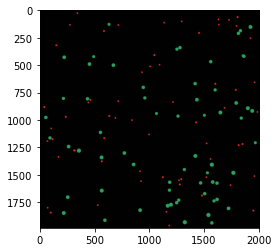

In [310]:
# determine image size, pad by largest radius + 20 %
im_padding  = max(cells[:,3])*1.2
im_width = int(max(cells[:,0]) + im_padding)
im_height= int(max(cells[:,1]) + im_padding)
# generate a blank image with the calculated dimensions and draw cells on it
# for comparing between timesteps probably just want to use the max x/y coords from all steps
blank_image = np.ones((im_height,im_width,3), np.uint8)


plt.imshow(blank_image)

            
def showcell(loc,rad,color):
    cv2.circle(blank_image, loc,rad,color,-1)
green = (44,162,95)
red = (222,45,38)

for cell in cells:
    xy_coord = (int(cell[0]),int(cell[1]))
    radius = int(cell[3])
    if cell[5]==1:
        color = green
    elif cell[5] ==2:
        color = red
    showcell(xy_coord,radius,color)


plt.imshow(blank_image)

In [311]:
ids = f['id']['0']
for i in ids:
    print(i)

117
2
83
34
67
28
80
120
98
108
50
5
70
65
53
13
85
94
112
40
48
9
60
109
1
16
10
62
59
19
20
78
21
92
23
74
87
114
113
90
76
119
46
35
45
95
51
33
66
107
116
100
91
42
52
104
71
31
86
118
11
25
93
75
102
63
8
115
15
22
99
101
61
64
43
55
12
47
82
36
3
32
6
79
89
111
77
96
4
49
105
14
26
81
97
110
18
58
29
69
37
39
73
44
103
68
7
54
27
57
84
17
30
41
56
24
38
72
106
88


In [312]:
for i in ids:
    print(i,f[radius_key(ts)][i-1])

117 4.666115735381812e-07
2 7.499756188322091e-07
83 7.446941004018184e-07
34 4.138059263016413e-07
67 4.4691747881568457e-07
28 4.5113185451915093e-07
80 9.29547245623229e-07
120 9.612363563309186e-07
98 9.242657272105576e-07
108 8.978581351167374e-07
50 4.110198852983822e-07
5 4.25423934535814e-07
70 4.581449785264639e-07
65 8.109300172357472e-07
53 4.5627555229560583e-07
13 4.7583391902240965e-07
85 8.820135797372666e-07
94 7.869462479119177e-07
112 4.3396534713766077e-07
40 4.259193161036433e-07
48 8.76732061375539e-07
9 4.651140048001533e-07
60 9.084211719625976e-07
109 4.432739094644661e-07
1 4.1982155598806085e-07
16 8.344799138504556e-07
10 4.4783712189507804e-07
62 4.128238946409977e-07
59 4.455166434115163e-07
19 4.4830691730758134e-07
20 8.291983954330733e-07
78 3.7046337611798233e-07
21 8.133538400787825e-07
92 4.805589893844305e-07
23 4.711837365199344e-07
74 8.820135798032156e-07
87 7.816647293790278e-07
114 8.714505427335228e-07
113 9.50673319525388e-07
90 4.758698418623

In [313]:
hrs = [int(x)/360 for x in timepoints]
df = pd.DataFrame(columns=['id','type','time','biomass'])
# loop over all cell ids, c, from time = 0
for c in f['id']['0']:
    # loop over all timepoints t
    for t,h in zip(timepoints,hrs):
        # get list of ids from timepoint t
        ids = f['id'][t]
        arr = ids.__array__(ids.dtype)
        # make sure cell id matches id of interest
        i = np.where(arr == c)[0][0]
        # get radius
        radius = f[radius_key(t)][i]
        volume = 4/3*np.pi*radius**3 #volume in m^3
        # get celltype
        celltype=f['type'][t][i]
        # color cells
        if celltype==1:
            color = '#2ca25f'
            mass = volume*370*1e18 # convert mass in kg to fg
        elif celltype ==2:
            color = '#de2d26'
            mass = volume*236*1e18
        elif celltype ==0:
            print('Celltype is 0',i,c,celltype)
        # append data to a dataframe
        df = df.append(pd.DataFrame([[c,celltype,h,mass]],columns=['id','type','time','biomass']),ignore_index=True)

In [314]:
df

,id,type,time,biomass
0,117,2,0.000000,90.082028
1,117,2,0.277778,88.205137
2,117,2,0.555556,86.368514
3,117,2,0.833333,84.574586
4,117,2,1.111111,82.822760
...,...,...,...,...
28195,88,2,63.888889,76.184007
28196,88,2,64.166667,80.207424
28197,88,2,64.444444,84.421049
28198,88,2,64.722222,88.829338


In [315]:
# id position within the datasets changes over time
for t in timepoints:
    ids = f['id'][t]
    arr = ids.__array__(ids.dtype)
    for i,id in enumerate(ids):
        if id ==15:
            print('15',i,np.where(arr == 15)[0][0])

15 68 68
15 69 69
15 69 69
15 69 69
15 69 69
15 69 69
15 69 69
15 70 70
15 71 71
15 72 72
15 73 73
15 73 73
15 74 74
15 74 74
15 74 74
15 74 74
15 74 74
15 74 74
15 75 75
15 75 75
15 75 75
15 76 76
15 77 77
15 77 77
15 77 77
15 78 78
15 78 78
15 79 79
15 79 79
15 79 79
15 80 80
15 80 80
15 81 81
15 84 84
15 85 85
15 85 85
15 85 85
15 86 86
15 86 86
15 86 86
15 89 89
15 91 91
15 93 93
15 94 94
15 94 94
15 94 94
15 96 96
15 98 98
15 98 98
15 99 99
15 99 99
15 99 99
15 101 101
15 101 101
15 103 103
15 104 104
15 106 106
15 106 106
15 107 107
15 107 107
15 109 109
15 109 109
15 110 110
15 111 111
15 111 111
15 112 112
15 113 113
15 114 114
15 115 115
15 118 118
15 119 119
15 120 120
15 123 123
15 123 123
15 126 126
15 127 127
15 129 129
15 131 131
15 132 132
15 134 134
15 153 153
15 154 154
15 156 156
15 158 158
15 159 159
15 162 162
15 164 164
15 165 165
15 165 165
15 165 165
15 167 167
15 168 168
15 169 169
15 169 169
15 171 171
15 171 171
15 175 175
15 175 175
15 179 179
15 179 179
15 1

In [319]:
ids = f['id'][t]
#help(ids)

In [321]:
#df[(df.id==i)].biomass.values

In [326]:
round(len(df.id.unique())/rows)

11

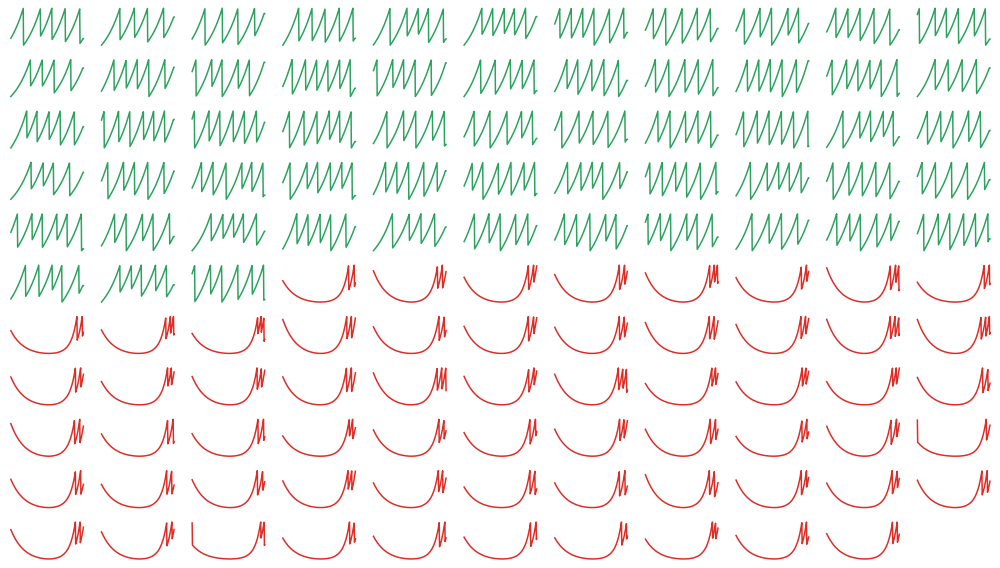

In [328]:
rows=round(np.sqrt(len(df.id.unique())))
cols = round(len(df.id.unique())/rows)
fig ,axes = plt.subplots(nrows=rows,ncols=cols,sharex=True,figsize=(14,8))
axs = axes.ravel()
for i in df.id.unique():
    celltype=df[(df.id==i) & (df.time ==0)].type.values[0]
    if celltype==1:
        color = '#2ca25f'
    elif celltype ==2:
        color = '#de2d26'
    elif celltype ==0:
        print('Celltype is 0',i,c,celltype,t)
    axs[i-1].plot(df[(df.id==i)].biomass.values,c=color)
    #axs[i].set_title(f['type']['0'][c])
for ax in axs:
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['left'].set_visible(False)
    ax.set_axis_off()
    #ax.spines['bottom'].set_visible(False)
    
fig.tight_layout()
plt.show()
#fig.savefig('growthcurves.png',dpi=600)

In [329]:
df[df.type==1].id.unique()

array([2, 34, 28, 50, 5, 53, 13, 40, 48, 9, 1, 16, 10, 19, 20, 21, 23, 46,
       35, 45, 51, 33, 42, 52, 31, 11, 25, 8, 15, 22, 43, 55, 12, 47, 36,
       3, 32, 6, 4, 49, 14, 26, 18, 58, 29, 37, 39, 44, 7, 54, 27, 57, 17,
       30, 41, 56, 24, 38], dtype=object)

Text(0, 0.5, 'Biomass (fg)')

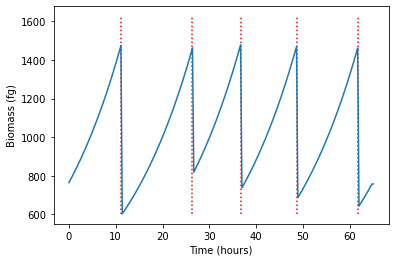

In [336]:
#plot cell size vs time
data = df[df.id==1].reset_index()
fig, ax = plt.subplots()
ax.plot(data.time,data.biomass)
for line in find_peaks(data.biomass):
    ax.vlines(data.time[line],data.biomass.min(),data.biomass.max()*1.1,color='r',ls=':')
ax.set_xlabel('Time (hours)')
ax.set_ylabel('Biomass (fg)')

In [331]:
pks,_ = find_peaks(data.biomass)

In [332]:
pks[0]

40

In [333]:
p0 = 0
for p1 in pks:
    #plt.plot(data.time[p0:p1],data.diameter[p0:p1])
    #plt.show()
    dt = data.time[p1]-data.time[p0]
    dy = data.biomass[p1]-data.biomass[p0]
    dydt = dy/dt
    #print(dydt)
    p0=p1+1

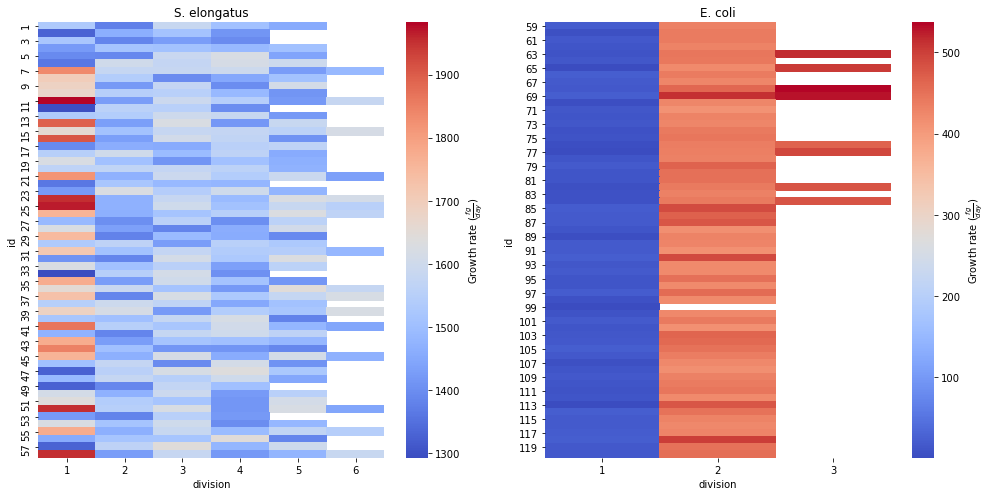

In [337]:
fig, axes = plt.subplots(ncols=2,figsize=(14,7))
celltypes = df.type.unique()
celltypes.sort()
for ct in celltypes:
    divs = pd.DataFrame(columns=['id','division','rate'])
    cells = df.id.unique()
    #cells.sort()
    for cell in cells:
        data = df[(df.id==cell) & (df.type==ct)].reset_index()
        pks,_ = find_peaks(data.biomass)
        p0 = 0
        for i,p1 in enumerate(pks):
            #plt.plot(data.time[p0:p1],data.diameter[p0:p1])
            #plt.show()
            dt = data.time[p1]-data.time[p0]
            dy = data.biomass[p1]-data.biomass[p0]
            dydt = dy/dt
            divs = divs.append(pd.DataFrame([[cell,i+1,dydt*24]],columns=['id','division','rate']),ignore_index=True)
            #print(dydt)
            p0=p1+1
    #plot cell id vs division rate over time
    piv = divs.pivot_table(index='id', columns='division', values='rate')
    g = sns.heatmap(piv, cmap='coolwarm',ax=axes[ct-1])
    cbar = g.collections[0].colorbar
    cbar.ax.set_ylabel(r'Growth rate ($\frac{fg}{day}$)')
axes[0].set_title('S. elongatus')
axes[1].set_title('E. coli')
fig.tight_layout()

In [338]:
df.type.unique()

array([2, 1], dtype=object)

In [340]:
df['rate'] = df.diff(periods=5).biomass/df.diff(periods=5).time
df['rate'][df.rate < 0] = np.nan
#for i in range(len(df)-1):
#    df.iloc[i+1,-1]=(df.diameter[i+1]-df.diameter[i])/(df.time[i+1]-df.time[i])

<ipython-input-340-d60edf918928>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['rate'][df.rate < 0] = np.nan


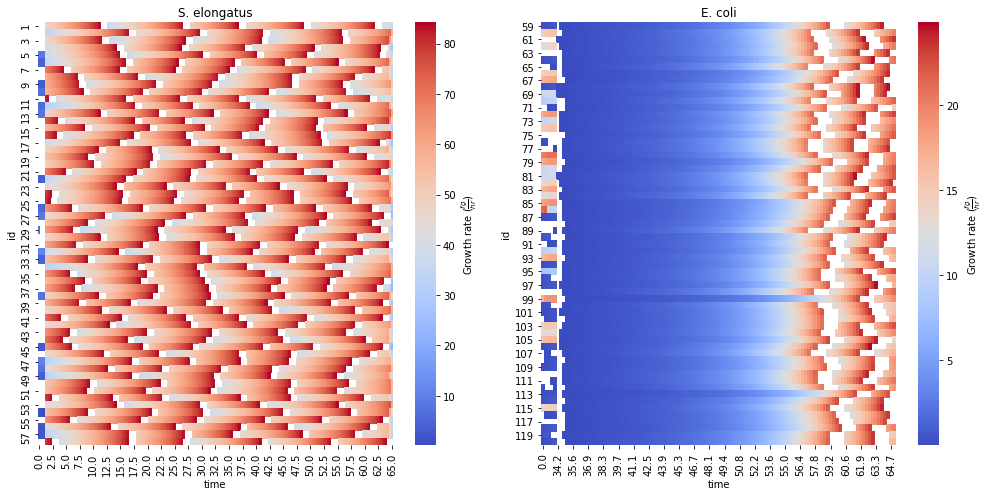

In [341]:
df.time = df.time.round(1)
fig, axes = plt.subplots(ncols=2,figsize=(14,7))
celltypes = df.type.unique()
celltypes.sort()
for ct in celltypes:
    rates = df[df.type==ct][['id','time','rate']]
    #plot cell id vs division rate over time
    piv = rates.pivot_table(index='id',columns='time', values='rate')
    g = sns.heatmap(piv, cmap='coolwarm',ax=axes[ct-1])
    cbar = g.collections[0].colorbar
    cbar.ax.set_ylabel(r'Growth rate ($\frac{fg}{hr}$)')
axes[0].set_title('S. elongatus')
axes[1].set_title('E. coli')
fig.tight_layout()

In [ ]:
#todo check local nutrient concentration of highly fit cells
#todo make animations with bounds around fit cells and compare with unfit cells